In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings("ignore")
from math import sqrt

In [2]:
df=pd.read_csv("dd.csv")
df1=df[df.ItemId==972142]

In [3]:
df2=df1[['WeekNoinTotal','QTY']]
df2=df2.set_index('WeekNoinTotal')
df2.head()

,QTY
WeekNoinTotal,
1,4
2,35
3,46
4,39
5,31


Text(0.5, 1.0, 'Time Series')

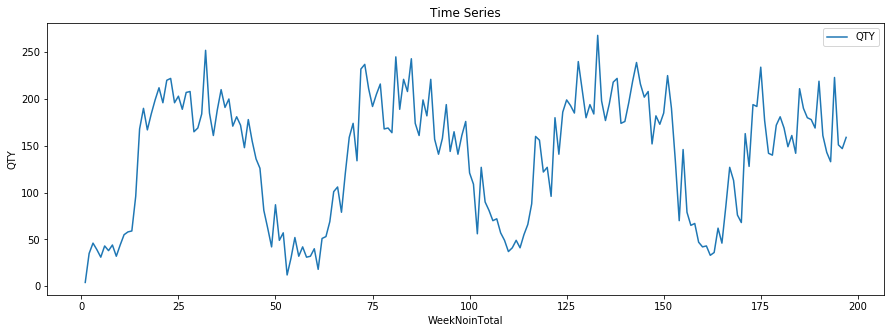

In [4]:
ax=df2.plot(figsize=(15,5))
ax.set_ylabel('QTY')
ax.set_xlabel('WeekNoinTotal')
ax.set_title('Time Series')

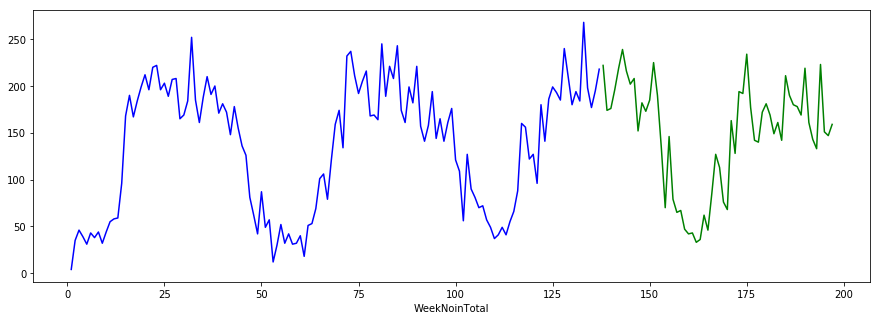

In [5]:
train = df2[:int(0.7*len(df2))]
test = df2[int(0.7*len(df2)):]

train['QTY'].plot(color='blue', figsize=(15,5))
test['QTY'].plot(color='green', figsize=(15,5))

In [6]:
from stldecompose import decompose

In [7]:
train.index = pd.DatetimeIndex(freq='w', start='2014-01-01', periods=137)
test.index = pd.DatetimeIndex(freq='w', start='2016-08-21', periods=60)

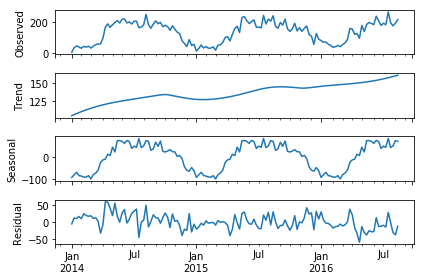

In [8]:
decomposed = decompose(train, period=52)
fig=decomposed.plot()

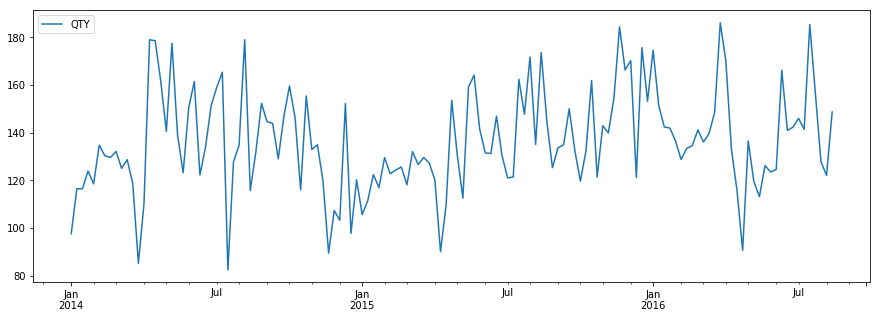

In [9]:
train_nonseasonal = train-decomposed.seasonal
train_nonseasonal.plot(figsize=(15,5))

(array([735234., 735354., 735477., 735599., 735719., 735842., 735964.,
        736085., 736208.]), <a list of 9 Text xticklabel objects>)

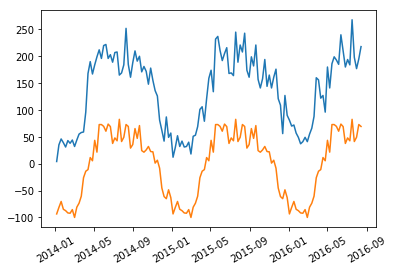

In [10]:
plt.plot(train)
plt.plot(decomposed.seasonal)
plt.xticks(rotation=30)

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

(array([735234., 735415., 735599., 735780., 735964., 736146., 736330.,
        736511.]), <a list of 8 Text xticklabel objects>)

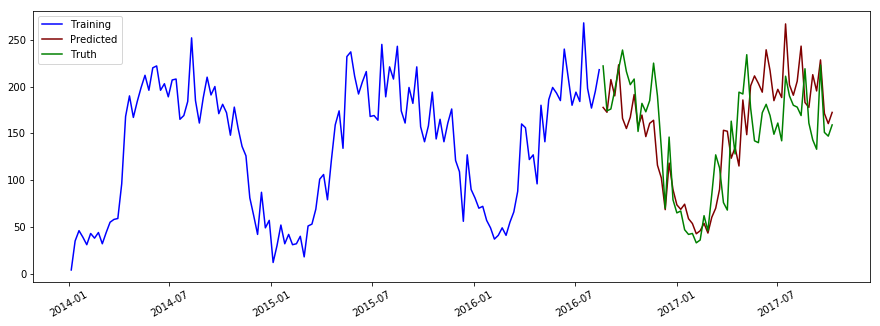

In [12]:
fit = ExponentialSmoothing(train, trend = 'add', seasonal='additive', seasonal_periods=52).fit()
pred = fit.forecast(60)

plt.rcParams["figure.figsize"] = [15,5]
plt.plot(train, label= 'Training', color='blue')
plt.plot(pred, label= 'Predicted', color='maroon')
plt.plot(test, label= 'Truth', color='green')

plt.legend(loc='best')
plt.xticks(rotation=30)

In [13]:
test.reset_index(inplace=True)
pred.reset_index(inplace=True, drop=True)

In [14]:
rmse = sqrt(((pred - test['QTY']) ** 2).mean())
print('The Root Mean Squared Error of forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of forecasts is 41.08


In [15]:
(((pred-test['QTY'])/test['QTY']).abs()).mean()

0.24146528323025823